In [1]:
%matplotlib inline

# Visualize Cell Segmentation Performance
This tutorial shows how to apply Bering to segment individual cells in the spatial data.

We conduct the visualization based on the Bering applications in MERFISH Cortex data (Zhang et al.), and Xenium data of Ductual Carcinoma In Situ (DCIS). For the training procedure, please refer to the documentation here: xxx and xxx.

In this documentation, we load the saved model directly and focus on the visualization part.

### Import packages & data

In [2]:
import random
import numpy as np
import pandas as pd
import tifffile as tiff
import matplotlib.pyplot as plt 

import Bering as br

## Visualize segmented cells in MERFISH data

In the analyzed data from the MERFISH Cortex dataset (Zhang et al.), there were xxx cells identified by the authors using Watershed in slice xxx. After identifying real signals, we identified individual cells and found more cells with satisfying boundaries in our prediction.

### load model

In [3]:
import pickle 
with open('models/MERFISH_cortex_model_simplified.pl', 'rb') as f:
    bg = pickle.load(f)

### Visualizing segmentation in a window

In the visualization, individual cells are assigned with unique colors. Background noises were not used for segmentation and colored in gray.

Plotting segmentation for the region around cell 930


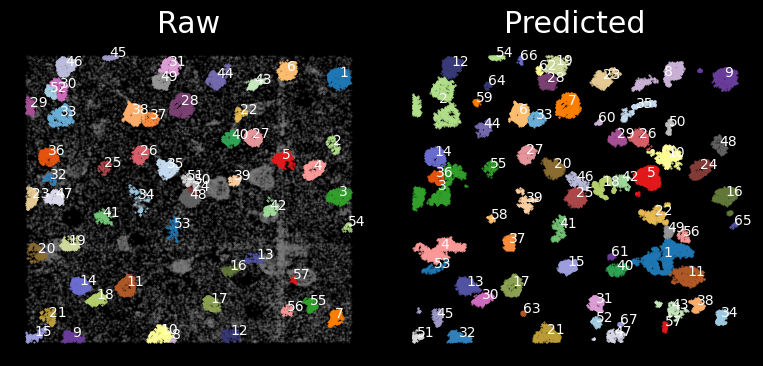

In [4]:
# randomly select cells
random_cells = cells = random.sample(bg.segmented.index.values.tolist(), 1)[:3]

# plot node classification
for random_cell in random_cells:
    print(f'Plotting segmentation for the region around cell {random_cell}')
    br.pl.Plot_Segmentation(
        bg, 
        cell_name = random_cell,
        n_neighbors = 30, 
        zoomout_scale = 8,
        pos_thresh = 0.6,
        resolution = 0.05,
        num_edges_perSpot = 300,
        min_prob_nodeclf = 0.3,
        n_iters = 10,
    )

### compare number of cells between original and Bering segmentation

The segmentation results were generated by Watershed in the original paper, where we can easily observed a lot of unsegmented real signals. We compare Bering segmentation output with the original segmentation using number of segmentation cells and ratio of recalled transcripts as the metrics.

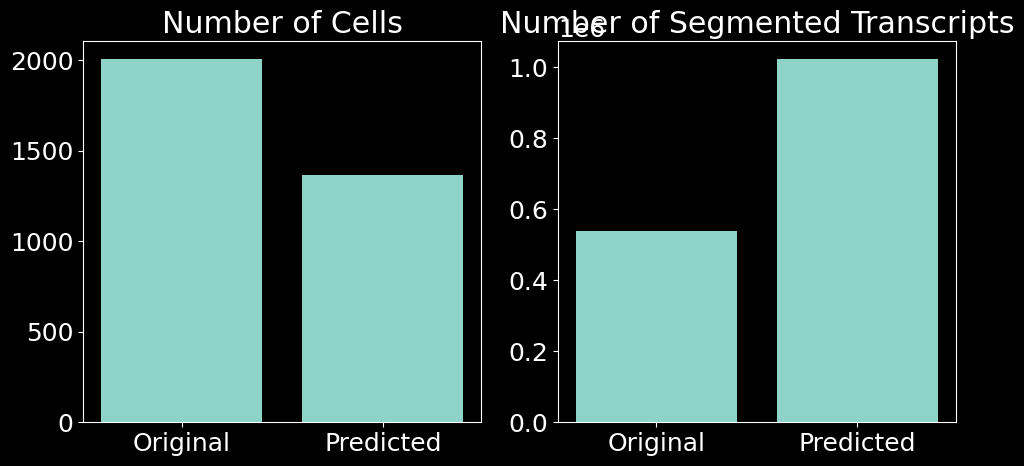

In [5]:
# conduct segmentation for whole slice
br.tl.node_classification(bg, bg.spots_all.copy(), n_neighbors = 30, )
br.tl.cell_segmentation(bg)

# number of cells
ncells_ori = len(bg.spots_all['segmented'].unique())
ncells_pred = len(bg.spots_all['predicted_cells'].unique())

# number of segmented transcripts
ntrans_ori = len(bg.spots_all[bg.spots_all['labels'] != 'background'])
ntrans_pred = len(bg.spots_all[bg.spots_all['predicted_node_labels'] != 'background'])

# draw plots
fig, axes = plt.subplots(1, 2, figsize = (10, 5))
axes[0].bar(['Original', 'Predicted'], [ncells_ori, ncells_pred])
axes[0].set_title('Number of Cells')
axes[1].bar(['Original', 'Predicted'], [ntrans_ori, ntrans_pred])
axes[1].set_title('Number of Segmented Transcripts')
fig.tight_layout()

## Visualize segmented cells in Breast cancer

The Xenium data of ductal carcinoma in-situ (DCIS) is a less noisy data. In the Bering application, we segmented individual cells in the tumor microenvironment.

### load model

In [6]:
with open('models/Xenium_dcis_model_simplified.pl', 'rb') as f:
    bg = pickle.load(f)

plotting segmentation for the region around cell 1202


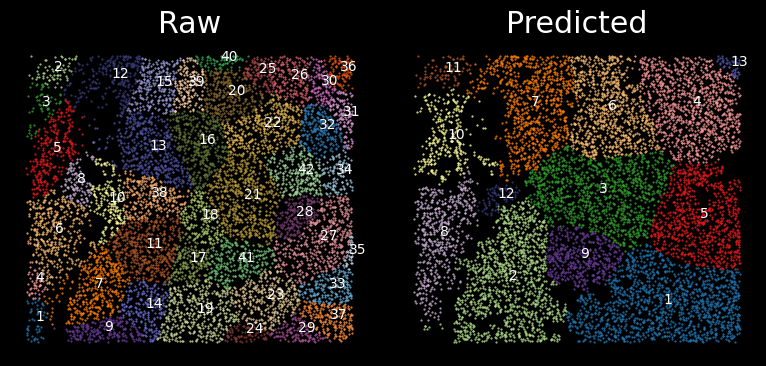

In [7]:
# randomly select a cell
random_cells = cells = random.sample(bg.segmented.index.values.tolist(), 1)[:3]

# plot node classification
for random_cell in random_cells:
    print(f'plotting segmentation for the region around cell {random_cell}')
    br.pl.Plot_Segmentation(
        bg, 
        cell_name = random_cell,
        n_neighbors = 10, 
        zoomout_scale = 4,
        pos_thresh = 0.6,
        resolution = 0.10,
        num_edges_perSpot = 300,
        min_prob_nodeclf = 0.3,
        n_iters = 10,
    )